# Проект 3. О вкусной и здоровой пище 

## Файлы проекта
- [my_decision.ipynb.ipynb](my_decision.ipynb.ipynb) - ноутбук с основным решением
- [answers_questions.ipynb](answers_questions.ipynb) - ноутбук с ответами по задачам в проекте
- [helpers.py](helpers.py) - вспомогательный модуль со скриптами, чтобы не перегружать кодом ноутбуки 
- [./datasets/main_task.csv](./datasets/main_task.csv) - датасет проекта
- [README.md](README.md) - описание проекта

## Что нужно сделать?

**Step 1**

- Посмотрим на данные.
- Посмотрим, где у нас пропуски.
- Определим тип признаков.

**Step 2**

- Создать свою первую модель, основанную на алгоритмах машинного обучения. Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно загрузить правильные данные. **Приведение данных в нужный вид и будет вашей задачей.**

**Step 3**

- **Повысить точность прогнозов**, которые делает модель, с помощью более тщательной подготовки данных. При подготовке датасета нужно будет не только избавиться от пропущенных (None) значений и нечисловых признаков, но и **сгенерировать новые признаки** (добавить в датафрейм новые столбцы) на основе информации, уже содержащейся в данных.
<br>

## Первоначальная версия датасета

Состоит из десяти столбцов, содержащих следующую информацию:

- **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
- **City** — город, в котором находится ресторан;
- **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
- **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- **Price Range** — диапазон цен в ресторане;
- **Number of Reviews** — количество отзывов о ресторане;
- **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
- **URL_TA** — URL страницы ресторана на TripAdvisor;
- **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display

# in order not to overload we will 
# put all the auxiliary scripts in a separate file
import helpers

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

In [2]:
# df = pd.read_csv('https://cms.skillfactory.ru/assets/courseware/v1/c00e440dce1926e20bcf7b959cbeebbb/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/main_task.csv')
df = pd.read_csv('./datasets/main_task.csv')

df.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
df.isnull().any()

Restaurant_id        False
City                 False
Cuisine Style         True
Ranking              False
Rating               False
Price Range           True
Number of Reviews     True
Reviews              False
URL_TA               False
ID_TA                False
dtype: bool

In [5]:
display([(col, type(df[col][0])) for col in df.columns])

[('Restaurant_id', str),
 ('City', str),
 ('Cuisine Style', str),
 ('Ranking', numpy.float64),
 ('Rating', numpy.float64),
 ('Price Range', str),
 ('Number of Reviews', numpy.float64),
 ('Reviews', str),
 ('URL_TA', str),
 ('ID_TA', str)]

## Разделение датафрейма

In [6]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)  
y = df['Rating'] 

In [7]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


y_train

16370    4.0
29680    3.5
9373     4.0
12562    4.0
29537    4.0
        ... 
15886    4.5
31531    4.5
21406    4.5
36154    4.0
29997    4.0
Name: Rating, Length: 30000, dtype: float64

In [8]:
dropped_columns =  ['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA']

X_train = X_train.drop(dropped_columns, axis=1).fillna(0)
X_test = X_test.drop(dropped_columns, axis=1).fillna(0)

## Создание, обучение и  тестирование модели

In [9]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
y_pred

array([4.365, 4.49 , 3.48 , ..., 3.98 , 4.065, 3.855])

## Как узнать, что моя модель хорошая?

Для оценки точности прогнозов, сделанных моделью, мы будем использовать метрику (показатель), которая называется **Mean Absolute Error**, и представляет собой среднее абсолютное значение отклонения предсказанных значений от фактических:

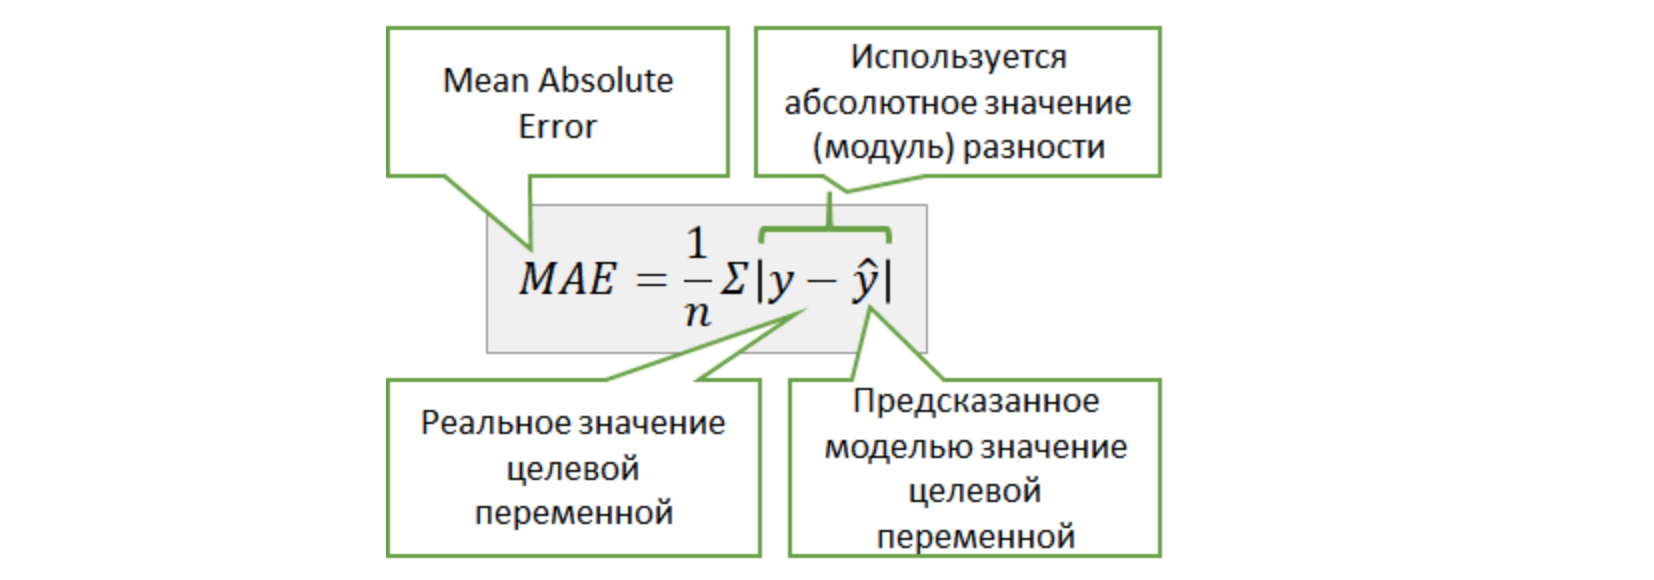

Иными словами, если у вас получился результат MAE = 0.5, то это значит, что модель при расчёте рейтинга ошибается в среднем на 0.5 баллов.

In [10]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  

MAE: 0.43139108858225106


Далее, **все ответы и расчёты на вопросы в заданиях** вынесены в отдельный файл <a href='answers_questions.ipynb'> answers_questions.ipynb</a>

In [11]:
df.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


## Дальнейшая очистка и подготовка датасета

In [12]:
cleaner = helpers.DatasetCleaner(df)

# showing what is the steps making in this pipeline 
cleaner.show_steps()
df = cleaner.run()

0  We give more understandable names of the data frame columns
1  Processing `price range` column
2  Processing `city` column 
3  Processing `cuisine_style` column and added new column `total_types_cuisine`
4  Processing `reviews` column, 1 column remove, 5 new columns adding


In [13]:
df.head(3)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,url_ta,id_ta,total_types_cuisine,review1,review_date1,review2,review_date2,timedelta_reviews
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,2,194.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,Good food at your doorstep,2017-12-31,A good hotel restaurant,2017-11-20,41 days
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,Unique cuisine,2017-07-06,Delicious Nepalese food,2016-06-19,382 days
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,3,688.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7,Catch up with friends,2018-01-08,Not exceptional,2018-01-06,2 days


## Повторная подготовка, обучение модели и вычисление показателя MAE

In [14]:
model = helpers.ModelProcessing(df)

# showing what is the steps making in this pipeline 
model.show_steps()

0  Getting 2 pieces - data as learning dataset and vector of a target variable 
1  Separating dataframe on pieces, needed for the learning and testing of the model
2  Create, learning, predicting result for a model
3  Returning the MAE indicator


In [15]:
model.run()

0  Getting 2 pieces - data as learning dataset and vector of a target variable  : None
1  Separating dataframe on pieces, needed for the learning and testing of the model : None
2  Create, learning, predicting result for a model : [3.475 3.43  3.    ... 3.745 4.125 3.86 ]
3  Returning the MAE indicator : 0.4113756886904762
